## **Introduction**
Web scraping is the process of collecting and parsing raw data from the Web. This is done by writting a program that accesses and extracts the necessary information. This project aims to scrap data from the [Wuzzf website](https://wuzzuf.net/search/jobs/?q=python&a=hpb) using python tools and libraries such as requests, lxml, BeautifulSoup, zip_longest etc

### **Installing Scraping Tools**

In [1]:
pip install requests

In [2]:
pip install lxml

In [3]:
pip install beautifulsoup4

### **Importing Libraries**

In [4]:
import requests
from bs4 import BeautifulSoup
import csv

from itertools import zip_longest

### **Access the web:**
*   Use requests to fetch the URL
*   Save page content
*   Create soup object to parse content





In [5]:
#use requests to fetch the URL
result= requests.get("https://wuzzuf.net/search/jobs/?q=python&a=hpb")

In [6]:
#save page content
source= result.content

In [7]:
#create soup object to parse content
soup= BeautifulSoup(source, 'lxml')

### **Find the specific data needed**:


*   Job Title

*   Company Name
*   Location


*   Skills



In [8]:
jobtitle= soup.find_all('h2', {'class': 'css-m604qf'})
company_names= soup.find_all('a',{'class':"css-17s97q8"})
location= soup.find_all('span', {'class':"css-5wys0k"})
skills= soup.find_all('div',{'class':"css-y4udm8"})

In [9]:
jobtitle_list=[]
companynames_list=[]
location_list=[]
skills_list=[]


In [10]:
for i in range(len(location)):
  jobtitle_list.append(jobtitle[i].text)
  companynames_list.append(company_names[i].text)
  location_list.append(location[i].text)
  skills_list.append(skills[i].text)

In [11]:
jobtitle_list

['Senior Python Developer (Django - PHP)',
 'Python Backend Developer',
 'Python/Django Backend Developer',
 'Python Developer',
 'AI & Data Science Python Developer Intern',
 'Python Developer',
 'Python Developer',
 'Python Developer',
 'Remote Senior Python Engineer',
 'Remote Python Data Scientist',
 'SASE Engineer with Python',
 'Python Django Developer',
 'AI Research Lead',
 'Junior Software Developer',
 'Senior odoo developer']

### **Store the information in a dataframe**

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
#define the path of the csv file
file_path= "/content/drive/MyDrive/jobsdata.csv"

#all the features
file_list= [jobtitle_list, companynames_list, location_list, skills_list]
exported= zip_longest(*file_list)

#open the fie and write in it. If does not exist, create it
with open(file_path, "w", newline='', encoding= "utf-8") as csvfile:

 #create a csv writer object in the file
 csv_writer= csv.writer(csvfile)

 #write data to the csv file
 csv_writer.writerow(['Job Title', 'Company Name', 'Location', 'Skills'])
 csv_writer.writerows(exported)


## **Conclusion**
Below is a representation of the dataframe created from the scraped data. It is noticable that the dataframe only contains the data that is required (Job Title, Company Name, Location and Skills).
Web Scraping importance is now evident since data analysis and machine learning steps can now be taken if need be.

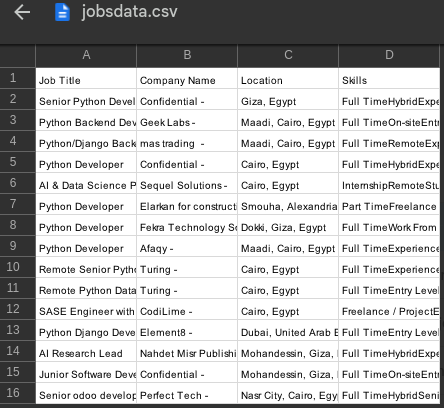
